# Clustering Problem

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp
import matplotlib.pyplot as plt

### Preprocessing

Since our dataset is stored as a txt file, we first change it to a csv file for future use. But we don't have to execute this every time.

In [2]:
'''
data_txt = np.loadtxt('./dataset/X_train.txt')
data_txtDF = pd.DataFrame(data_txt)
data_txtDF.to_csv('./dataset/X_tran.csv',index=False)
'''

"\ndata_txt = np.loadtxt('./dataset/X_train.txt')\ndata_txtDF = pd.DataFrame(data_txt)\ndata_txtDF.to_csv('./dataset/X_tran.csv',index=False)\n"

In [4]:
train_X = pd.read_csv('./dataset/X_tran.csv')
train_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


Now we use sklearn to do preporcess to the origin dataset to make the dataset have zero mean.

In this cell we are doing centered to all samples by $X-X_{mean}$

In [5]:
mean_datascaler = sklpp.StandardScaler(with_mean=True, with_std=False)
ctd_train_X = mean_datascaler.fit_transform(train_X)
ctd_train_X.mean()

1.812331270571422e-18

### Feature Extraction

After we have the centered matrix, we can do the dimensionality reduction to this matrix. Here we want the the information to have more than 90% and we can see that 34 components were reserved.

In this cell, the following codes will do singular value decomposition to the samples and dicide how many components should be reserved by the variance ratio. In this case, we want to keep a 90% of energy, so 34 components were saved.

In [5]:
data_pca = skldecomp.PCA(n_components=0.9, svd_solver='full')
skl_features = data_pca.fit_transform(ctd_train_X)

In [6]:
data_pca.n_components_

34

As we can see on the graphic below, the first component contributes the most energy ratio, which also means that the fisrt component carries the most information.

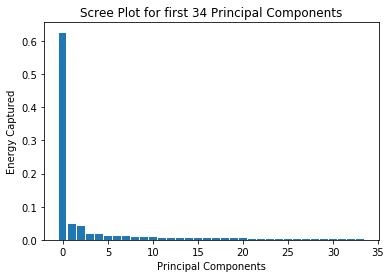

In [7]:
#energy analysis
energy_captured = data_pca.explained_variance_ratio_
principal_components = [i for i in range(34)]
plt.bar(principal_components, energy_captured)
plt.title('Scree Plot for first 34 Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Energy Captured')
plt.show()

### KMeans Clustering

KMeans is a clustering methods who aims to partition the n observations into k sets so that we can minimize the whin-cluster sum of squares (Which is been called WCSS).

In [7]:
from sklearn import cluster as cluster

The following cell execute the KMeans Clustering algorithm. Which is basically repeat executing assignment and update.

In [9]:
KMeans_pred = cluster.KMeans(n_clusters=6).fit_predict(skl_features)

Now we have done the KMeans Clustering. Since we are doing this clustering on a hyperplane, which we can not show what this plane is exactly look like, we pick two dimensoins to show how the clustering performe. We pick the first two components as the axies.

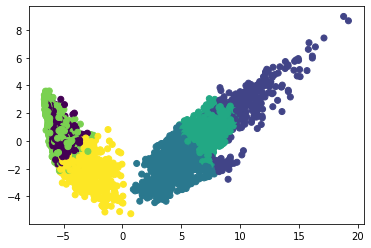

In [18]:
plt.scatter(skl_features[:, 0], skl_features[:, 1], c=KMeans_pred)
plt.show()

### GMM Clustering

GMM (Gaussian Mixed Model) can be simply seen as a linear combination of multiple Gaussion distributions.

In [8]:
from sklearn.mixture import GaussianMixture as GMM

In [12]:
GMM_pred = GMM(n_components=6).fit(skl_features).predict(skl_features)

Now we do the same process with KMeans Clustering to have an overall picture of the performance.

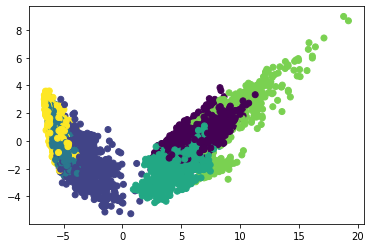

In [19]:
plt.scatter(skl_features[:,0], skl_features[:,1],c=GMM_pred)
plt.show()

### Spectral Clustering

In [9]:
from sklearn.cluster import SpectralClustering

This clustering method roots in graph theory. This algorithm can be briefly summarize to two step. The first step is to constract the graph according to the features of each sample. And then separate the big graoh into different subgraphs.

In [15]:
Spectral_pred = SpectralClustering(n_clusters=6).fit_predict(skl_features)

Also, do the same process to plot the graph

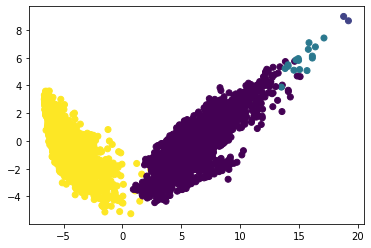

In [20]:
plt.scatter(skl_features[:,0], skl_features[:,1],c=Spectral_pred)
plt.show()

### Performance Analysis

To evaluate the performance of the three methods, we want to use the purity of each clusters.

Purity can be defined like this. Since we have the true label of every samples, so we can label each cluster as the most label contained in a single cluster. And then we compute the correctly labeled samples over the total number of samples to dicide purity.

In [23]:
label_Y = pd.read_csv('./dataset/y_tran.csv')

#### KMeans Cluster Performence

Now we use purity to evaluate the performance of KMeans Clustering. We first caculate the most classes contain in each clusters to dicide the label of each cluster.

In [66]:
series=[]
KM_pre_label=[]
for i in range(0,6):
    print('pre label------',i,'------')
    position = np.argwhere(KMeans_pred == i).T[0]
    one_se = []
    for pos in position:
        one_se.append(label_Y.loc[pos].iloc[0])
    series.append(one_se)
    print('most label')
    p_l = max(one_se,key=one_se.count)
    print(p_l)
    KM_pre_label.append(p_l)

pre label------ 0 ------
most label
5.0
pre label------ 1 ------
most label
3.0
pre label------ 2 ------
most label
2.0
pre label------ 3 ------
most label
3.0
pre label------ 4 ------
most label
6.0
pre label------ 5 ------
most label
5.0


In [67]:
pre_Y = KM_pre_label
total = 0
for i in range(0,6):
    #accr.append(series[i].count(pre_Y[i])/len(series[i]))
    total = total + series[i].count(pre_Y[i])
KMeans_purity = total/len(label_Y)
print(KMeans_purity)

0.5792981501632208


Now we can see that the purity of the KMeans cluster to our dataset is almost 0.58.

#### GMM Cluster Performance

Now we use the same way to dicide the purity of GMM Clustering

In [68]:
series=[]
GMM_pre_label=[]
for i in range(0,6):
    print('pre label------',i,'------')
    position = np.argwhere(GMM_pred == i).T[0]
    one_se = []
    for pos in position:
        one_se.append(label_Y.loc[pos].iloc[0])
    series.append(one_se)
    print('most label')
    p_l = max(one_se,key=one_se.count)
    print(p_l)
    GMM_pre_label.append(p_l)

pre label------ 0 ------
most label
1.0
pre label------ 1 ------
most label
5.0
pre label------ 2 ------
most label
5.0
pre label------ 3 ------
most label
2.0
pre label------ 4 ------
most label
3.0
pre label------ 5 ------
most label
6.0


In [69]:
pre_Y = GMM_pre_label
total = 0
for i in range(0,6):
    #accr.append(series[i].count(pre_Y[i])/len(series[i]))
    total = total + series[i].count(pre_Y[i])
GMM_purity = total/len(label_Y)
print(GMM_purity)

0.5846028291621328


#### Spectral Cluster Performance

The last one is the Spectral Cluste.

In [70]:
series=[]
Spectral_pre_label=[]
for i in range(0,6):
    print('pre label------',i,'------')
    position = np.argwhere(Spectral_pred == i).T[0]
    one_se = []
    for pos in position:
        one_se.append(label_Y.loc[pos].iloc[0])
    series.append(one_se)
    print('most label')
    p_l = max(one_se,key=one_se.count)
    print(p_l)
    Spectral_pre_label.append(p_l)

pre label------ 0 ------
most label
1.0
pre label------ 1 ------
most label
3.0
pre label------ 2 ------
most label
3.0
pre label------ 3 ------
most label
6.0
pre label------ 4 ------
most label
3.0
pre label------ 5 ------
most label
6.0


In [71]:
pre_Y = Spectral_pre_label
total = 0
for i in range(0,6):
    #accr.append(series[i].count(pre_Y[i])/len(series[i]))
    total = total + series[i].count(pre_Y[i])
Spectral_purity = total/len(label_Y)
print(GMM_purity)

0.5846028291621328


As we can see from the aspect of purity, the GMM Clustering shows the best performance among the three clustering methods. But the bad news is that GMM just achieve an purity of 58.5%. We will show the results of three methods and the original distribution of samples' label below in four graphs.

In [56]:
l_Y = np.array(label_Y).T.astype(int)[0]

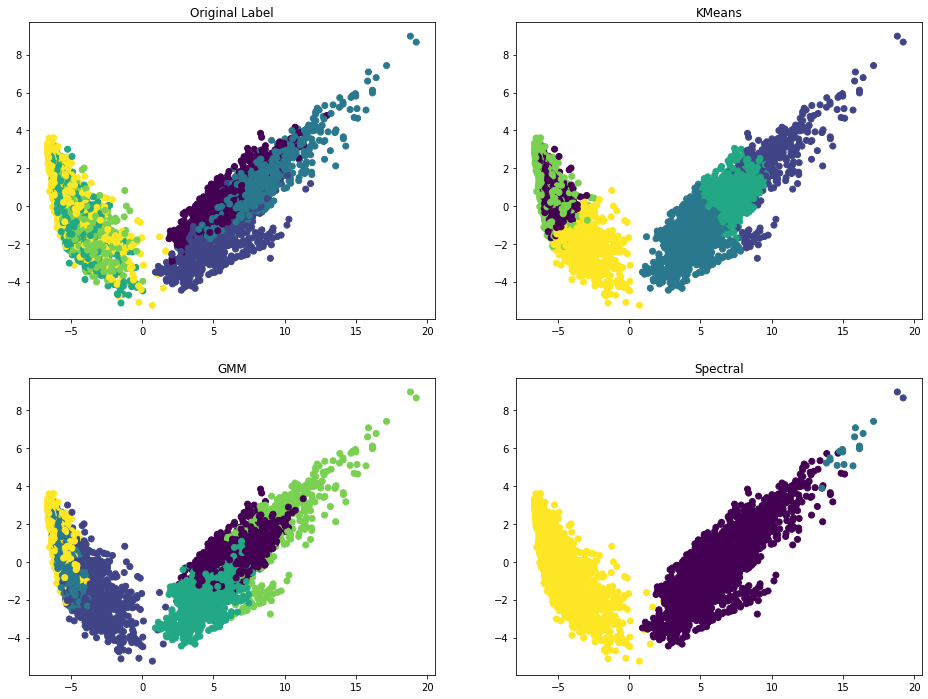

In [72]:
plt.figure(figsize=(16,12))
# original labels
plt.subplot(221)
plt.title('Original Label')
plt.scatter(skl_features[:, 0], skl_features[:, 1], c=l_Y)
# KMeans Cluster
plt.subplot(222)
plt.title('KMeans')
plt.scatter(skl_features[:, 0], skl_features[:, 1], c=KMeans_pred)
# GMM Cluster
plt.subplot(223)
plt.title('GMM')
plt.scatter(skl_features[:, 0], skl_features[:, 1], c=GMM_pred)
# Specrtal Cluster
plt.subplot(224)
plt.title('Spectral')
plt.scatter(skl_features[:, 0], skl_features[:, 1], c=Spectral_pred)

plt.show()

From the first picture we can see that the original samples distribute really close and is actually hard to be divided clearly. And as the purity shows, the GMM shows the most similar distribution with the true labels. Since we are dealing with a hyperspace lets observe the result from another direction to see the distributions.

This time we choose the first and the last components as the axies

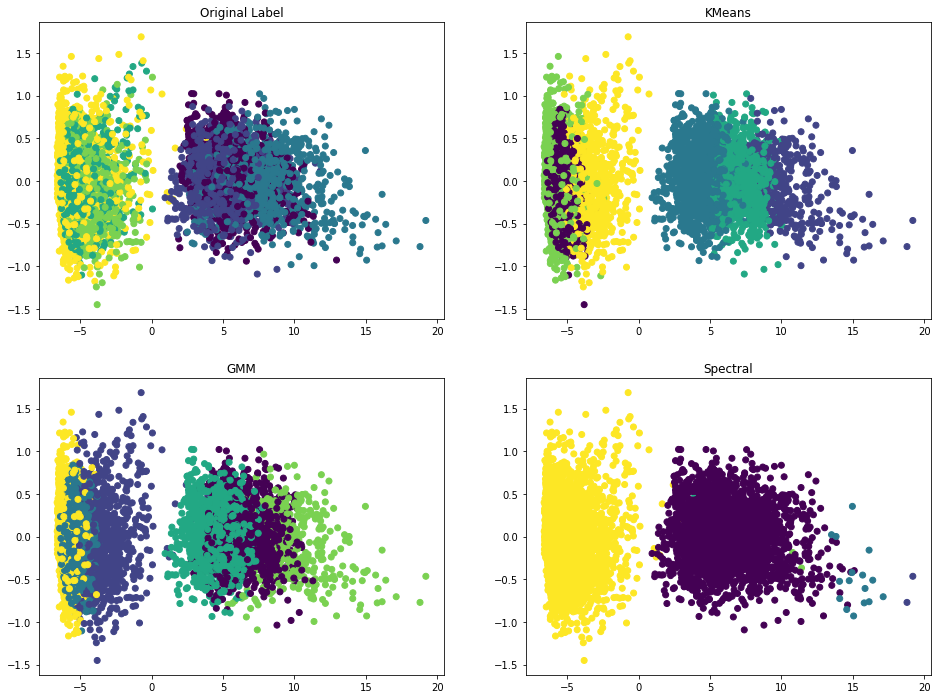

In [73]:
plt.figure(figsize=(16,12))
# original labels
plt.subplot(221)
plt.title('Original Label')
plt.scatter(skl_features[:, 0], skl_features[:, 33], c=l_Y)
# KMeans Cluster
plt.subplot(222)
plt.title('KMeans')
plt.scatter(skl_features[:, 0], skl_features[:, 33], c=KMeans_pred)
# GMM Cluster
plt.subplot(223)
plt.title('GMM')
plt.scatter(skl_features[:, 0], skl_features[:, 33], c=GMM_pred)
# Specrtal Cluster
plt.subplot(224)
plt.title('Spectral')
plt.scatter(skl_features[:, 0], skl_features[:, 33], c=Spectral_pred)

plt.show()

From a new perspective, we can see that samples in the KMeans clusters are more concentrated to each other. And the samples in the GMM clusters is more dispresive sompared to the KMeans cluster, which looks more like the original distribution even they have a similar purity. Also, as the purity shows, the Spectral Clusters shows a really bad performance. It basically separates the dataset into two clusters, the rest four clusters just have few samples contained.